### Dataset Description:

#### Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

### Importing the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Loading our data:

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data exploration and processing:

In [3]:
# check the number of columns and rows we have:
df.shape

(569, 33)

In [4]:
# Getting a statistical summary of the data: 
df.describe().round()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,0.0
mean,30371831.0,14.0,19.0,92.0,655.0,0.0,0.0,0.0,0.0,0.0,...,26.0,107.0,881.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
std,125020586.0,4.0,4.0,24.0,352.0,0.0,0.0,0.0,0.0,0.0,...,6.0,34.0,569.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,8670.0,7.0,10.0,44.0,144.0,0.0,0.0,0.0,0.0,0.0,...,12.0,50.0,185.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
25%,869218.0,12.0,16.0,75.0,420.0,0.0,0.0,0.0,0.0,0.0,...,21.0,84.0,515.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
50%,906024.0,13.0,19.0,86.0,551.0,0.0,0.0,0.0,0.0,0.0,...,25.0,98.0,686.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
75%,8813129.0,16.0,22.0,104.0,783.0,0.0,0.0,0.0,0.0,0.0,...,30.0,125.0,1084.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
max,911320502.0,28.0,39.0,188.0,2501.0,0.0,0.0,0.0,0.0,0.0,...,50.0,251.0,4254.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN


In [5]:
# more info about the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# check for missing values:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# dropping the only columns with missing data we have:
df.drop(columns = "Unnamed: 32", axis= 1, inplace= True)

In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# check for duplicated values:

df.duplicated().sum()

0

In [10]:
# check the count of malignant(M) and benign(B) tumors we have:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

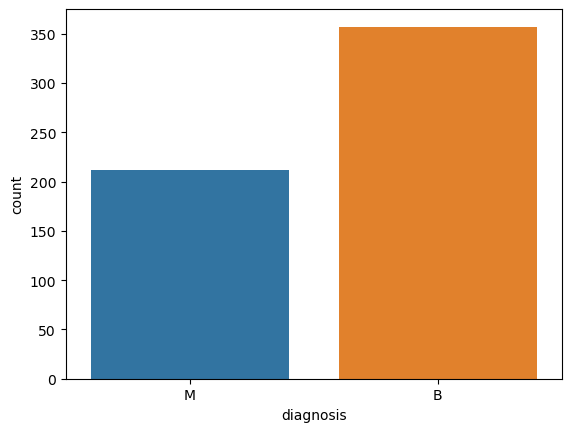

In [11]:
sns.countplot(x= "diagnosis", data=df )

### Pre-processing for machine learning:

In [12]:
# converting the "diagnosis" to 0 and 1, malignant(M) = 0, benign(B) = 1:

dummy = pd.get_dummies(df["diagnosis"])

dummy.head()

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [13]:
# concatonate the new column with our dataframe

newdf = pd.concat((df,dummy), axis =1)

newdf.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,B,M
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


In [14]:
newdf.drop(columns=["id","diagnosis","B"], axis=1, inplace=True)

newdf.rename(columns={"M":"M_or_B"}, inplace=True)

newdf.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M_or_B
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### Creating x and y variables:

In [15]:
x = newdf.drop(columns = "M_or_B", axis = 1)

y = newdf["M_or_B"]

In [16]:
print(x)
print(y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

### Creating training and testing data:

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [18]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (455, 30) (114, 30)


### Training our model:

In [19]:
regressor = LogisticRegression()

regressor.fit(x_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[[-1.2694621  -0.5340483  -0.11993236  0.01252153  0.05151421  0.24483852
   0.32807926  0.13703205  0.07791373  0.01715456 -0.04162196 -0.55943341
  -0.1901726   0.09738105  0.00374701  0.04794049  0.06670052  0.01625452
   0.0196548   0.00417972 -1.24731324  0.55715051  0.19859551  0.0165552
   0.08852399  0.74608025  0.89471651  0.26476838  0.24567957  0.074174  ]]
[-0.22552891]


C:\Users\User\anaconda4new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Making prediction and evaluting the model:

In [20]:
# making prediction on training data:
train_pred = regressor.predict(x_train)

In [21]:
# accuracy on training data:

train_score = accuracy_score(train_pred, y_train)
print(f"The accuracy on training data :{train_score}")

The accuracy on training data :0.9560439560439561


In [22]:
# making prediction on test data:
test_pred = regressor.predict(x_test)

In [23]:
test_score = accuracy_score(test_pred, y_test)
print(f"The accuracy on test data :{test_score}")

The accuracy on test data :0.9385964912280702


### Building predictive system



### We will create a function to receive the features values from the user, and predict whether the person has a heart disease or not based on user inputs

In [24]:
newdf.shape

(569, 31)

In [25]:

def tumor_predict():
    
    cols = 30
    
    info_list = []
    
    tempdf = newdf.drop(columns = "M_or_B", axis =1)
    
    for i in range(cols):
        user = input(f" Enter the {tempdf.columns[i]}: ")
        info_list.append(user)
        info_list = list(np.float_(info_list))
    
    # converting the "info_list" to numpy array to fit it to the model
    info_array = np.asarray(info_list)
    
    # reshaping our array on order to make one data piont prediciton each time
    info_array = info_array.reshape(1,-1)
    
    #  making our prediction
    prediction = regressor.predict(info_array)
    
    if (prediction[0] == 0):
        
        print(f"(The predicted value is:{prediction},\nThe tumor is benign)")
    else:
        print(f"(The predicted value is:{prediction},\nThe tumor is malignant)")



In [26]:
def tumor_predict2():
    
    col_names = df.columns
    info_list = []
    user = input(f" Enter the {col_names} in order ")
    
    info_list1 = [float(x) for x in user.split(",") ]
    
    # converting the "info_list" to numpy array to fit it to the model
    info_array = np.asarray(info_list1)
    
    # reshaping our array on order to make one data piont prediciton each time
    info_array = info_array.reshape(1,-1)
    
    #  making our prediction
    prediction = regressor.predict(info_array)
    
    if (prediction[0] == 0):
        
        print(f"(The predicted value is:{prediction},\nThe tumor is benign)")
    else:
        print(f"(The predicted value is:{prediction},\nThe tumor is malignant)")


### In case we wanted to insert the features values one by one, we can call "tumor_predict()" function and start inserting data.

### And in case we wanted to insert all features values at once, we can call "tumor_predict2()" function and start inserting data.

In [27]:
# uncomment the function you want to use:

#tumor_predict()

#tumor_predict2()